In [1]:
# スライド資料です。
import os

# 実行パスがdocker内になっているか確認
assert str(os.path).__contains__("/usr/local/lib/python3.10/posixpath.py")

サンプル数	20000
平均		45.09239858503384
標準偏差	38.53483962624178


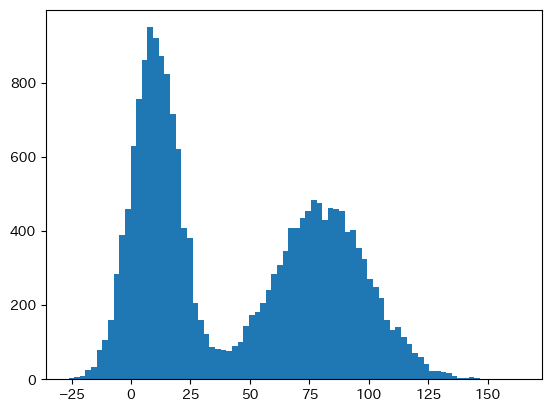

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
 
generator = np.random.default_rng()
rnd1 = generator.normal(loc=10, scale=10, size=10000)
rnd2 = generator.normal(loc=80, scale=20, size=10000)
rnd = np.concatenate([rnd1, rnd2])

plt.hist(rnd, bins=80)
 
print('サンプル数\t' + str(len(rnd)))
print('平均\t\t' + str(rnd.mean()))
print('標準偏差\t' + str(rnd.std()))

In [1]:
import pandas as pd

bins = 10

html = pd.read_html('http://www.eiren.org/toukei/screen.html')
df = html[0]
df.columns = ["都道府県", "全国スクリーン数", "一般スクリーン数", "シネコンスクリーン数", "デジタル設備", "3D設備"]
df = df.reset_index(drop=True).set_index("都道府県")
df = df.drop("都道府県", axis=0)
df = df.drop("全国", axis=0)
df = df.astype("int32")
df.head()

,全国スクリーン数,一般スクリーン数,シネコンスクリーン数,デジタル設備,3D設備
都道府県,,,,,
東京,406,74,332,399,138
神奈川,221,16,205,218,77
千葉,220,6,214,220,69
埼玉,227,6,221,227,75
群馬,52,5,47,51,14


In [3]:
df["全国スクリーン数"].describe()

count     47.000000
mean      77.319149
std       82.181429
min       10.000000
25%       27.000000
50%       52.000000
75%       81.500000
max      406.000000
Name: 全国スクリーン数, dtype: float64

In [15]:
# 度数分布表
dbp = pd.DataFrame(df["全国スクリーン数"].value_counts(bins=bins, sort=False))
dbp = dbp.reset_index().set_index(pd.RangeIndex(bins))
dbp["階級"] = dbp["全国スクリーン数"].apply(lambda x: "{}以上{}未満".format(x.left, x.right)) # pd.Intervalという型
dbp["階級値"] = dbp["全国スクリーン数"].apply(lambda x: int(np.mean([x.left, x.right]))) # pd.Intervalという型

dbp["度数"] = dbp["count"]
dbp["相対度数"] = dbp["度数"] / dbp["度数"].sum()
dbp["累積相対度数"] = dbp["相対度数"].cumsum()
dbp = dbp.drop(["count", "全国スクリーン数"], axis = 1)
dbp

,階級,階級値,度数,相対度数,累積相対度数
0,9.603以上49.6未満,29,23,0.489362,0.489362
1,49.6以上89.2未満,69,13,0.276596,0.765957
2,89.2以上128.8未満,109,4,0.085106,0.851064
3,128.8以上168.4未満,148,0,0.000000,0.851064
4,168.4以上208.0未満,188,1,0.021277,0.872340
5,208.0以上247.6未満,227,4,0.085106,0.957447
6,247.6以上287.2未満,267,1,0.021277,0.978723
7,287.2以上326.8未満,307,0,0.000000,0.978723
8,326.8以上366.4未満,346,0,0.000000,0.978723
9,366.4以上406.0未満,386,1,0.021277,1.000000


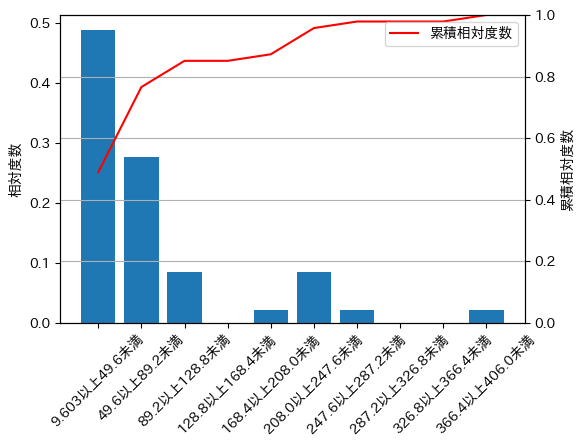

In [23]:
fig, ax1 = plt.subplots(figsize=(6,4))
data_num = len(dbp)

ax1.bar(dbp["階級"], dbp["相対度数"], label="相対度数")
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel("相対度数")

ax2 = ax1.twinx()
ax2.plot(dbp["階級"], dbp["累積相対度数"], label="累積相対度数", color="red")
ax2.set_ylim([0, 1])
ax2.set_ylabel("累積相対度数")

ax2.grid(True, which='both', axis='y')

plt.legend()
plt.show()

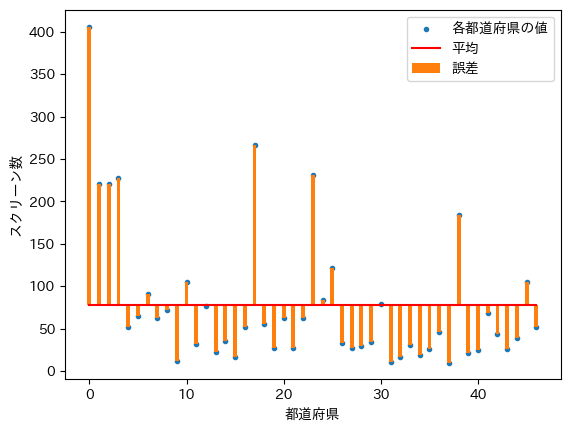

In [30]:
screens = df["全国スクリーン数"]
x = list(range(0, len(screens)))
plt.scatter(x, screens, marker=".", label="各都道府県の値")

means = np.full(len(x), screens.mean())
plt.plot(x, means, label="平均", color="red")

diff = screens - means
plt.bar(x, diff, bottom=means, width=0.4, label="誤差")
plt.xlabel('都道府県')
plt.ylabel('スクリーン数')

plt.legend()
plt.show()

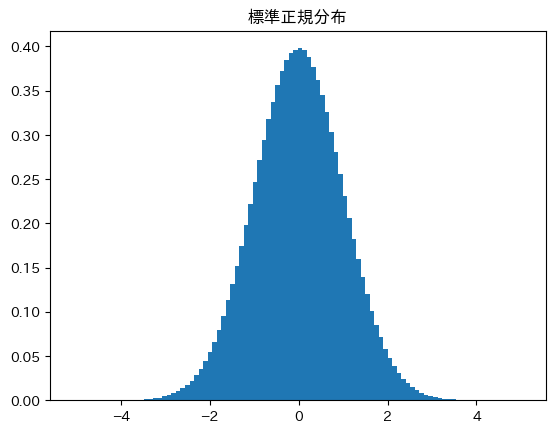

In [73]:
# 正規分布生成
import numpy as np
import matplotlib.pyplot as plt
 
generator = np.random.default_rng()
#rnd = generator.normal(loc=10, scale=10, size=1000)
rnd = generator.normal(loc=0, scale=1, size=10000000)

plt.hist(rnd, bins=100, density = True)
plt.title("標準正規分布")
plt.show()

#print('サンプル数\t' + str(len(rnd)))
#print('平均\t\t' + str(rnd.mean()))
#print('標準偏差\t' + str(rnd.std()))

array([[<Axes: title={'center': '正規分布'}>,
        <Axes: title={'center': '自由度2のポアソン分布'}>],
       [<Axes: title={'center': '自由度20のポアソン分布'}>,
        <Axes: title={'center': '一様分布'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

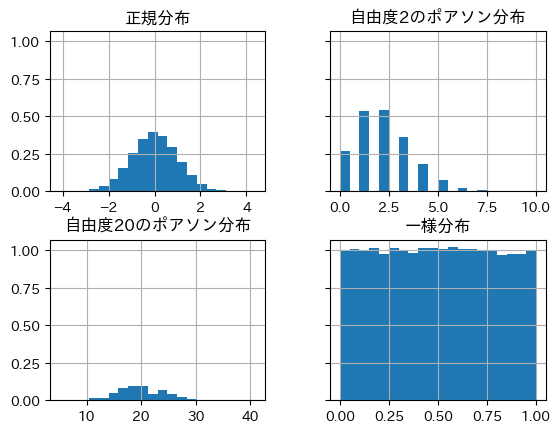

In [62]:
# 正規分布生成
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
generator = np.random.default_rng()

n = 100000

_ = pd.DataFrame({
    "正規分布": generator.normal(loc=0, scale=1, size=n),
    "自由度2のポアソン分布": generator.poisson(lam=2, size=n),
    "自由度20のポアソン分布": generator.poisson(lam=20, size=n),
    "一様分布": generator.uniform(low=0, size=n),
})

plt.tight_layout()
_.hist(bins=20,density=True, sharey=True)

/tmp/ipykernel_86/706447404.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, n)):


  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'n=1000')

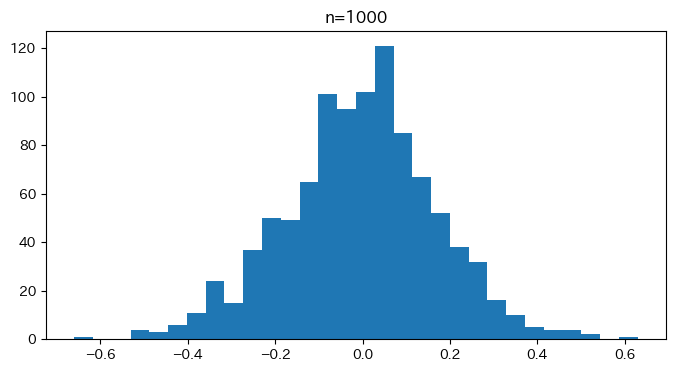

In [90]:
# 中心極限定理

from tqdm import tqdm_notebook as tqdm

def saikoro():
    generator = np.random.default_rng()
    return int(generator.uniform(1,7)) # 一様乱数を生成

def saikoro_takusan_huru(n):
    return np.array([saikoro() for i in range(0, n)])

means = []
n = 1000 # 10000超えると激重
for i in tqdm(range(0, n)):
    _n = 100
    results = saikoro_takusan_huru(_n) - np.full(_n, 7/2)
    means.append(np.mean(results))

plt.figure(figsize=(8, 4))
plt.hist(means, bins=30)
plt.title("n={}".format(n))

/tmp/ipykernel_86/819246659.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm(ns):


  0%|          | 0/300 [00:00<?, ?it/s]

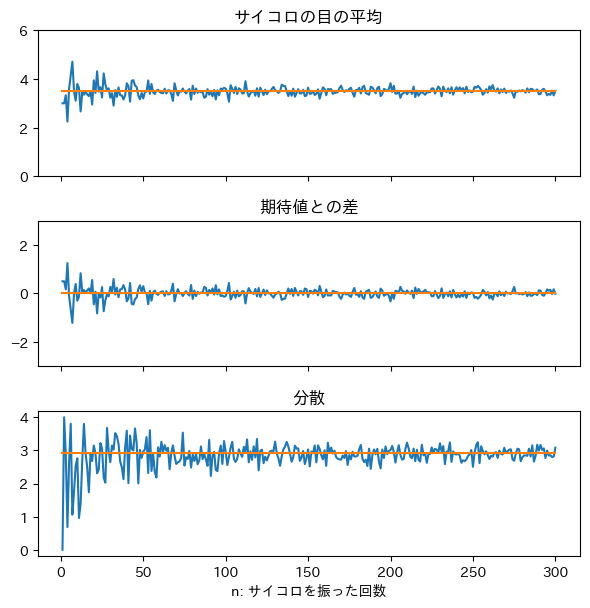

In [96]:
# 大数の法則

m = 300
ns = np.array(range(1, 1 + m))
means = []
vars = []
kitaichis = np.full(m, 3.5)
for n in tqdm(ns):
    results = saikoro_takusan_huru(n)
    means.append(np.mean(results))
    vars.append(np.var(results))
    
fig, ax = plt.subplots(3,1,figsize=(6,6), sharex=True)
ax[0].plot(ns, means)
ax[0].plot(ns, np.full(m, 3.5))
ax[0].set_title("サイコロの目の平均")
ax[0].set_ylim([0, 6])

ax[1].plot(ns, kitaichis-means)
ax[1].plot(ns, np.zeros(m))
ax[1].set_title("期待値との差")
ax[1].set_ylim([-3, 3])

ax[2].plot(ns, vars)
ax[2].plot(ns, np.full(m, 35/12))
ax[2].set_title("分散")
#ax[2].set_ylim([0, 3])

plt.tight_layout()
plt.xlabel("n: サイコロを振った回数")
plt.show()


<Axes: xlabel='height', ylabel='sex'>

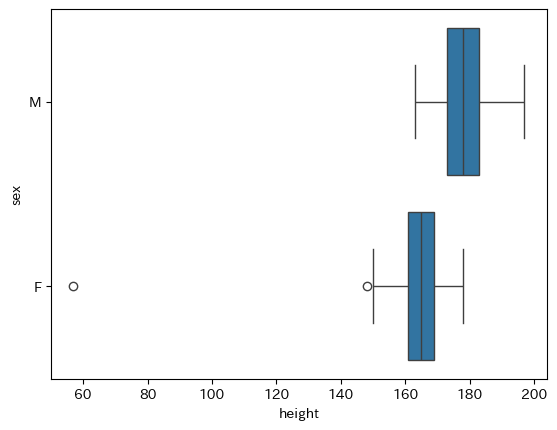

In [49]:
import seaborn as sns

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv', index_col=False)
df = df[["rownames", "sex", "weight", "height"]]
df = df.reset_index(drop=True).set_index('rownames')

sns.boxplot(data=df, x="height", y="sex")

<Axes: xlabel='weight', ylabel='sex'>

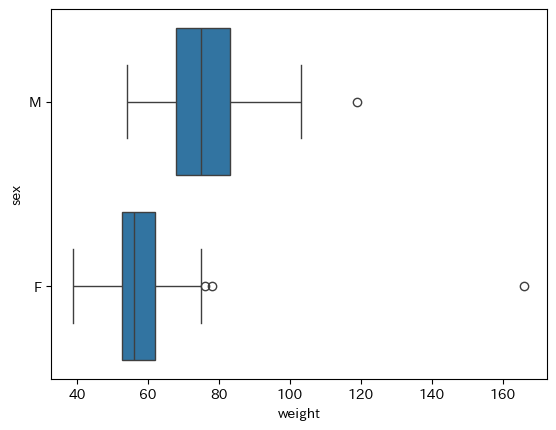

In [50]:
sns.boxplot(data=df, x="weight", y="sex")

<Axes: xlabel='height', ylabel='weight'>

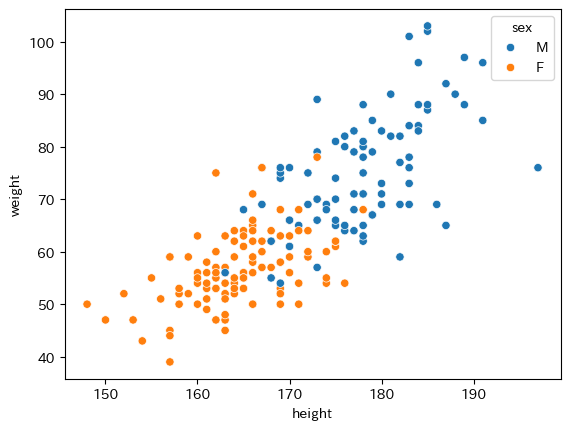

In [51]:
# height < 120. weight > 110を除去
# 本当はテスト訓練分けた後に、訓練からだけ削除するのが普通
# 今回はスライド資料を作るのが目的なので手抜き

df = df.loc[df["weight"] < 110]
df = df.loc[df["height"] > 120]

sns.scatterplot(data=df, x="height", y="weight", hue="sex")

(198, 3)
(198, 3) (178, 3) (20, 3) (10, 3) (10, 3)


<BarContainer object of 178 artists>

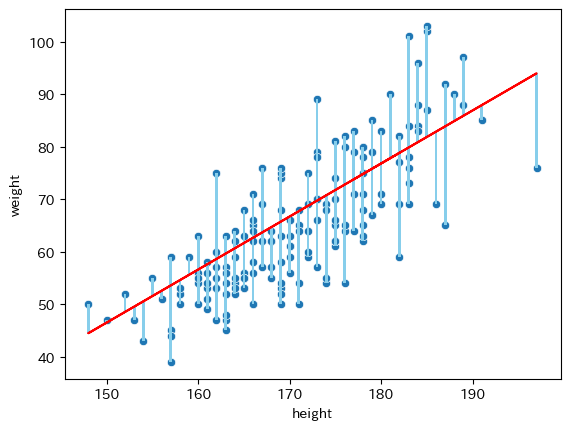

In [52]:
# 適当にテストデータを10個ほど取り出す

print(df.shape)
df_male_test = df.loc[df["sex"] == "M"].sample(10)
df_female_test = df.loc[df["sex"] == "F"].sample(10)
df_test = pd.concat([df_male_test, df_female_test])

df_train = df.copy()
df_train = df_train.loc[~df_train.index.isin(df_test.index)]

print(df.shape, df_train.shape, df_test.shape, df_male_test.shape, df_female_test.shape)

fig, ax = plt.subplots()
sns.scatterplot(data=df_train, x="height", y="weight")

# 適当に線引いてみる
y_hat1 = df_train["height"] * 1.01 - 105
ax.plot(df_train["height"], y_hat1, color="red")

ax.bar(df_train["height"], df_train["weight"] - y_hat1, bottom=y_hat1, color="skyblue", width=0.3)

coefficient =  1.0955183387010736
intercept =  -121.94955343302165

MAE 4.978267903343834
MSE 39.77551003034294
RMSE 6.3067828589815065
R2 0.7539062966986253


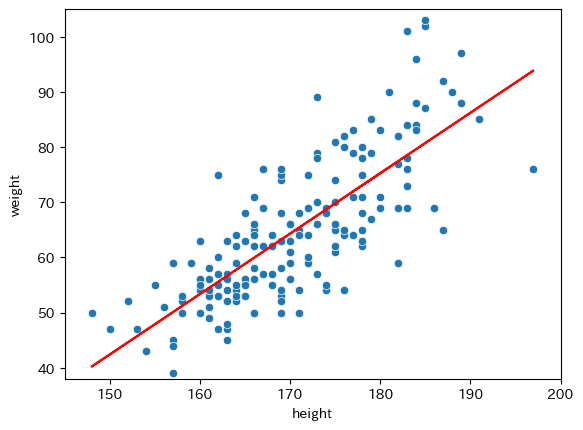

In [143]:
# 線形回帰
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = df_train[['height']].values         # 説明変数
Y = df_train['weight'].values         # 目的変数

lr.fit(X, Y)

print('coefficient = ', lr.coef_[0]) # 係数
print('intercept = ', lr.intercept_) # 切片
print()

fig, ax = plt.subplots()
sns.scatterplot(data=df_train, x="height", y="weight")
y_hat1 = df_train["height"] * lr.coef_[0] + lr.intercept_
ax.plot(df_train["height"], y_hat1, color="red")
ax.set_xlim([145, 200])
ax.set_ylim([38, 105])

# テストデータで検証
predicts = lr.predict(df_test[['height']].values)
print("MAE", mean_absolute_error(df_test['weight'].values, predicts))
print("MSE", mean_squared_error(df_test['weight'].values, predicts))
print("RMSE", np.sqrt(mean_squared_error(df_test['weight'].values, predicts)))
print("R2", r2_score(df_test['weight'].values, predicts))

MAE 5.235697753474383
MSE 49.642956104445574
RMSE 7.045775763139612
R2 0.6928557571920275


/usr/local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


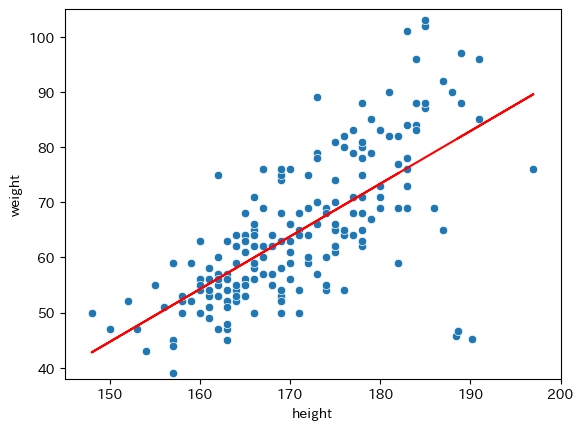

In [159]:
import random

df2 = df.copy()
df2 = pd.concat([
    df2,
    pd.DataFrame({
        "height": [190 + random.uniform(-2, 2) for i in range(1, 20)], 
        "weight": [45 + random.uniform(-2, 2) for i in range(1, 20)]
    })
])

lr2 = LinearRegression()

lr2.fit(df2[["height"]], df2["weight"])

fig, ax = plt.subplots()
sns.scatterplot(data=df2, x="height", y="weight")
y_hat2 = df2["height"] * lr2.coef_[0] + lr2.intercept_
ax.plot(df2["height"], y_hat2, color="red")
ax.set_xlim([145, 200])
ax.set_ylim([38, 105])

predicts2 = lr2.predict(df_test[['height']].values)
print("MAE", mean_absolute_error(df_test['weight'].values, predicts2))
print("MSE", mean_squared_error(df_test['weight'].values, predicts2))
print("RMSE", np.sqrt(mean_squared_error(df_test['weight'].values, predicts2)))
print("R2", r2_score(df_test['weight'].values, predicts2))